In [110]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
values = [[1,4,'Mavi'], [3,4,'Mavi'], [2,3,'Mavi'],[7,4,'Kırmızı'],[7,7,'Kırmızı']] 
dataset = pd.DataFrame(values, columns=['Feature1','Feature2','Renk'])

prediction_values = [[3,7]]
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
dataset

,Feature1,Feature2,Renk
0,1,4,Mavi
1,3,4,Mavi
2,2,3,Mavi
3,7,4,Kırmızı
4,7,7,Kırmızı


In [120]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pred_val = sc.transform(pd.DataFrame(prediction_values))

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2) # metric could be minkowski
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
valuefromsample = classifier.predict(pred_val)
print("KNearestNeighbor.md dokumanında anlatıldığı gibi 3 ve 7  öznitelikleri {} sınısına atandı".format(valuefromsample))

KNearestNeighbor.md dokumanında anlatıldığı gibi 3 ve 7  öznitelikleri ['Mavi'] sınısına atandı
[[-0.57735027 -0.57735027]
 [ 0.96225045  1.73205081]
 [-1.34715063 -0.57735027]
 [ 0.96225045 -0.57735027]]


array(['Mavi', 'Kırmızı', 'Mavi', 'Kırmızı'], dtype=object)

In [127]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

y_train=np.where(y_train =='Mavi', 'as', y_train)
y_train=np.where(y_train =='Kırmızı', 'dd' , y_train)

classifier2 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2) # metric could be minkowski
classifier2.fit(X_train,list(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


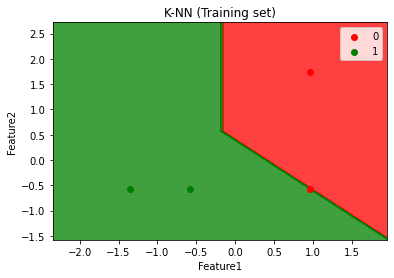

In [129]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.05))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


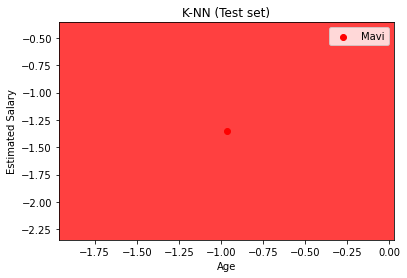

In [130]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()